In [1]:
from demoparser2 import DemoParser
import polars as pl
import pandas as pd 
import matplotlib.pyplot as plt

# 1. Định nghĩa tham số
PATH_TO_DEMO = "500k_1.dem"
WANTED_STEAMID = 76561199196898257
START_TICK = 33850
END_TICK = 33900
# 0-4: 33844-33900
# 1-9: 73788-73808

# Các thuộc tính (properties) của người chơi bạn muốn lấy ra
WANTED_PROPERTIES = [
    "pitch",
    "yaw",
    "active_weapon_ammo",
    "tick"
]

In [2]:
# 2. Khởi tạo DemoParser
parser = DemoParser(PATH_TO_DEMO)

tick = list(range(START_TICK, END_TICK + 1))
# 3. Trích xuất tick data với bộ lọc
df_ticks = parser.parse_ticks(
    WANTED_PROPERTIES,
    players=[WANTED_STEAMID], # Lọc theo steamid
    ticks=tick # Lọc theo khoảng tick
)
df = df_ticks

In [3]:
print(df)

    active_weapon_ammo     pitch         yaw   tick            steamid  \
0                 11.0 -0.065918   75.190094  33850  76561199196898257   
1                 11.0 -0.065918   75.190094  33852  76561199196898257   
2                 11.0 -0.065918   75.190094  33853  76561199196898257   
3                 11.0 -0.065918   75.190094  33854  76561199196898257   
4                 11.0 -0.065918   75.234039  33855  76561199196898257   
5                 11.0 -0.087891   75.652191  33856  76561199196898257   
6                 11.0 -0.132172   76.994263  33857  76561199196898257   
7                 11.0  0.440140   80.888214  33859  76561199196898257   
8                 11.0  0.659866   81.416260  33860  76561199196898257   
9                 10.0  0.593948   81.834076  33861  76561199196898257   
10                10.0  0.198090   82.560181  33862  76561199196898257   
11                10.0 -0.682190   84.232178  33863  76561199196898257   
12                10.0 -1.737900   87.

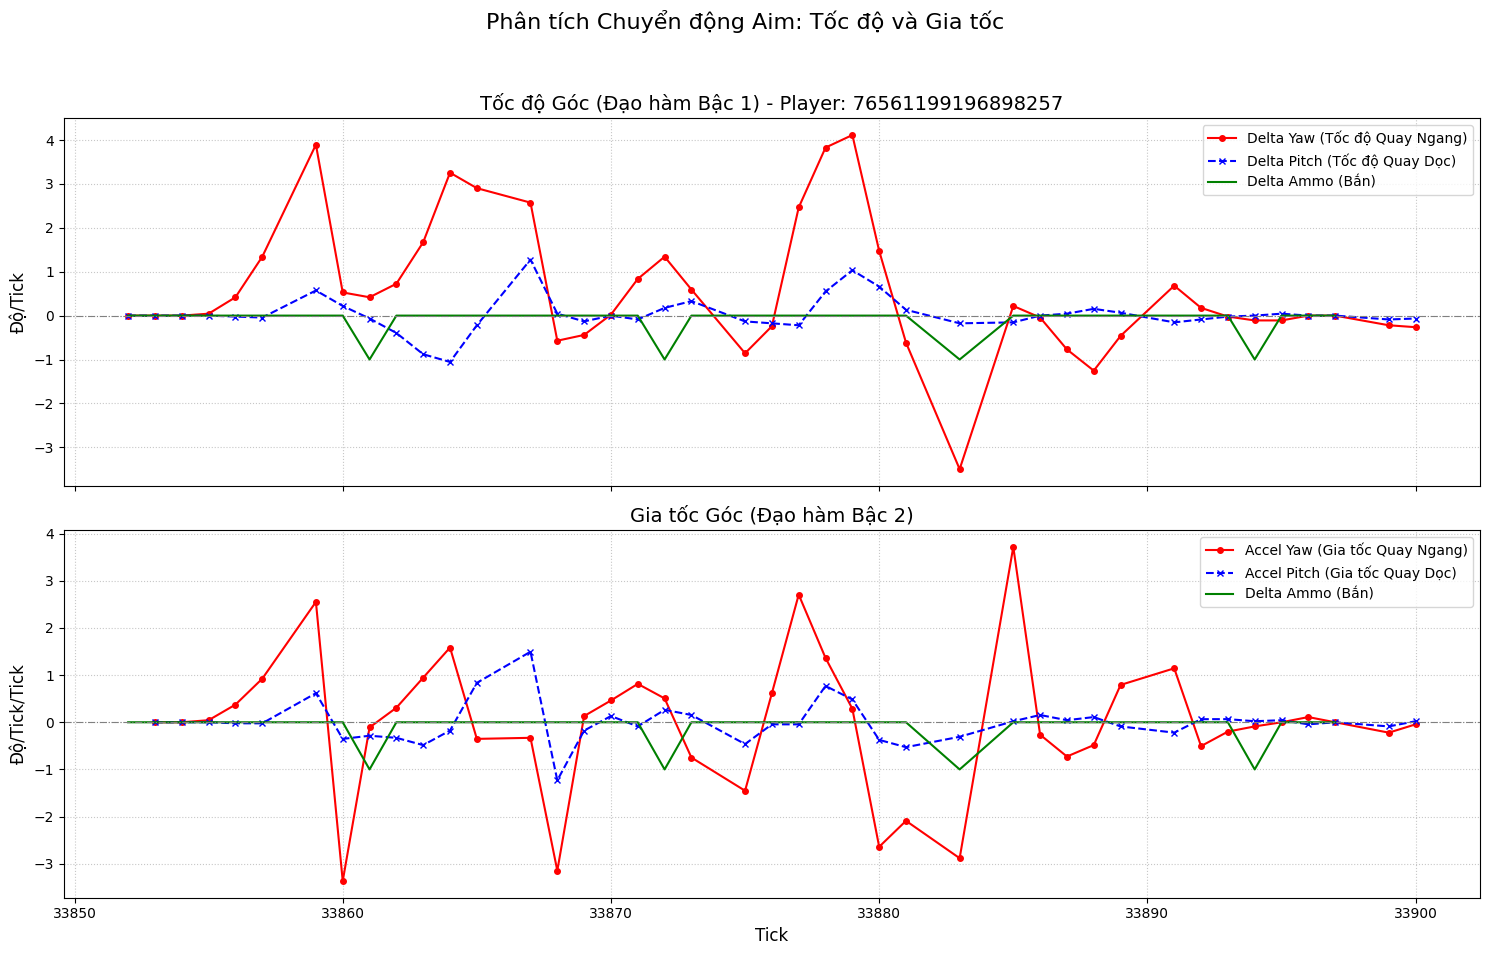

In [4]:
# Tính toán Đạo hàm Bậc 1 (Tốc độ Góc)
# Dùng phương thức .diff() của Pandas
df['delta_pitch'] = df['pitch'].diff()
df['delta_yaw'] = df['yaw'].diff()

df['delta_ammo'] = df['active_weapon_ammo'].diff()

# Tính toán Đạo hàm Bậc 2 (Gia tốc Góc)
df['accel_pitch'] = df['delta_pitch'].diff()
df['accel_yaw'] = df['delta_yaw'].diff()

# --- 4. VẼ BIỂU ĐỒ TỐC ĐỘ VÀ GIA TỐC ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
plt.suptitle('Phân tích Chuyển động Aim: Tốc độ và Gia tốc', fontsize=16)

# ĐỒ THỊ 1: TỐC ĐỘ GÓC (Vận tốc)
ax1.plot(df['tick'], df['delta_yaw'], label='Delta Yaw (Tốc độ Quay Ngang)', color='red', marker='o', markersize=4)
ax1.plot(df['tick'], df['delta_pitch'], label='Delta Pitch (Tốc độ Quay Dọc)', color='blue', marker='x', markersize=4, linestyle='--')
ax1.plot(df['tick'], df['delta_ammo'], label='Delta Ammo (Bắn)', color='green')
ax1.axhline(0, color='gray', linestyle='-.', linewidth=0.8)
ax1.set_title(f'Tốc độ Góc (Đạo hàm Bậc 1) - Player: {WANTED_STEAMID}', fontsize=14)
ax1.set_ylabel('Độ/Tick', fontsize=12)
ax1.legend()
ax1.grid(True, linestyle=':', alpha=0.7)

# ĐỒ THỊ 2: GIA TỐC GÓC (Acceleration)
ax2.plot(df['tick'], df['accel_yaw'], label='Accel Yaw (Gia tốc Quay Ngang)', color='red', marker='o', markersize=4)
ax2.plot(df['tick'], df['accel_pitch'], label='Accel Pitch (Gia tốc Quay Dọc)', color='blue', marker='x', markersize=4, linestyle='--')
ax2.plot(df['tick'], df['delta_ammo'], label='Delta Ammo (Bắn)', color='green')
ax2.axhline(0, color='gray', linestyle='-.', linewidth=0.8)
ax2.set_title('Gia tốc Góc (Đạo hàm Bậc 2)', fontsize=14)
ax2.set_xlabel('Tick', fontsize=12)
ax2.set_ylabel('Độ/Tick/Tick', fontsize=12)
ax2.legend()
ax2.grid(True, linestyle=':', alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()